# Descriptive Statistics

review visualisasi dg Python:

- line , bar , area plot
- pie chart
- box plot
- scatter plot
- histogram
- word cloud
- map (folium) with marker, choropleth

Descriptive statistic :
- measure of central tendency (titik tengah data)
- mesaure of spread / dispersion (penyebaran data)
- correlation - scatter plot
- 5 point summary - box plot
- distribution - histogram

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

line , bar , area plot digunakan untuk :

1. memperlihatkan trend (line chart)

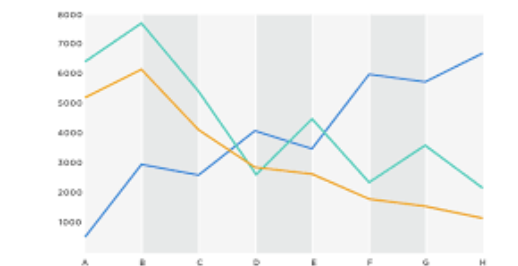

2. membandingkan data (bar chart)

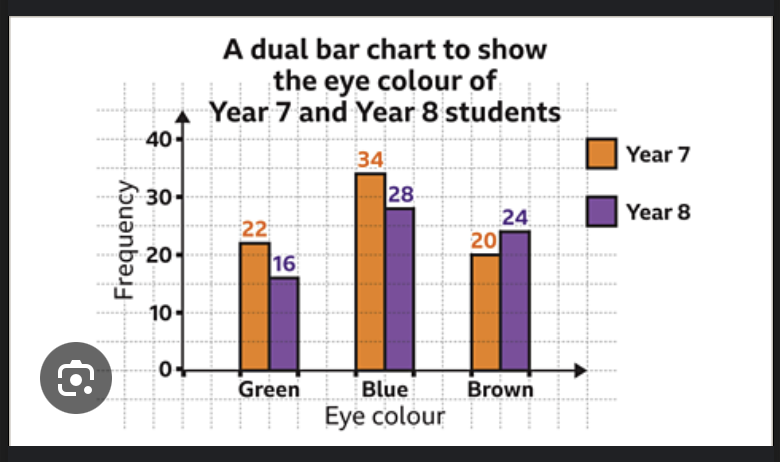

3. penggabungan bar & line(area plot)

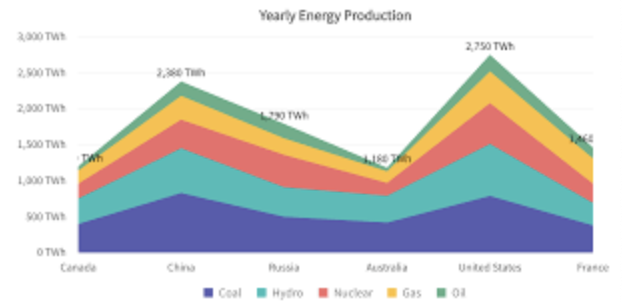


In [4]:
#line , bar , area plot

df_can = pd.read_excel("https://github.com/stefkwan-h8/dataset/raw/refs/heads/main/Canada.xlsx",
                       sheet_name='Canada by Citizenship',
                       skiprows=20,
                       skipfooter=2)

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
#data cleansing

df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [9]:
df_can2 = df_can[['OdName', 'AreaName',  'RegName', 1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013]]

# ganti judul kolom
df_can2 = df_can2.rename(columns={"OdName":"Country", "AreaName":"Continent", "RegName":"Region"})

# jadikan kolom Country sebagai index
df_can2 = df_can2.set_index("Country")
df_can2.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,0,1,1,0,0,0,0,1,1


In [22]:
#kita ambil negara Indonesia, Singapore & Malaysia
df_insgmy = df_can2.loc[['Indonesia', 'Singapore', 'Malaysia']]
df_insgmy.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,Asia,South-Eastern Asia,186,178,252,115,123,100,127,213,...,552,632,613,657,661,504,712,390,395,387
Singapore,Asia,South-Eastern Asia,241,301,337,169,128,139,205,372,...,311,392,298,690,734,366,805,219,146,141
Malaysia,Asia,South-Eastern Asia,786,816,813,448,384,374,425,817,...,401,593,580,600,658,640,802,409,358,204


<Axes: xlabel='Country'>

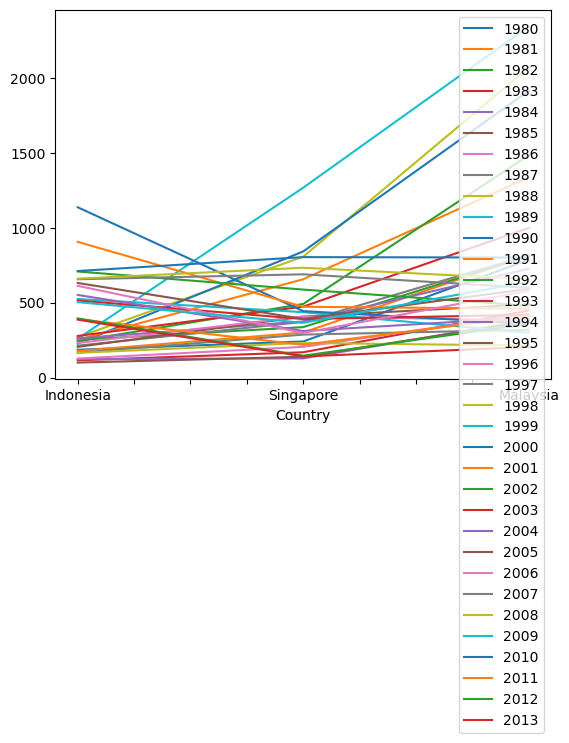

In [13]:
df_insgmy.plot(kind="line")

In [24]:
#saat plot index menjadi x axis
years = range(1980, 2014)
df_insgmy_years = df_insgmy[years]



In [25]:
df_insgmy_years.T.head()

Country,Indonesia,Singapore,Malaysia
1980,186,241,786
1981,178,301,816
1982,252,337,813
1983,115,169,448
1984,123,128,384


<Axes: >

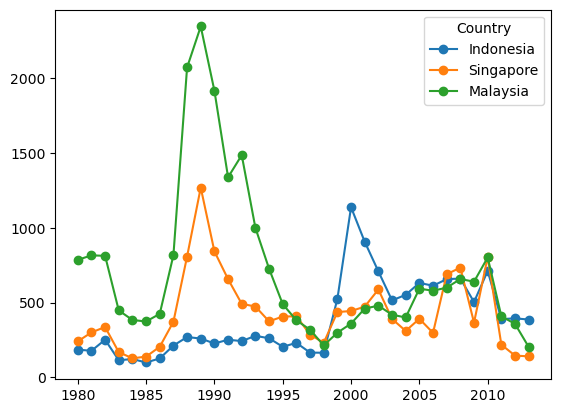

In [32]:
df_insgmy_years.T.plot(kind="line",marker = "o")

<Axes: >

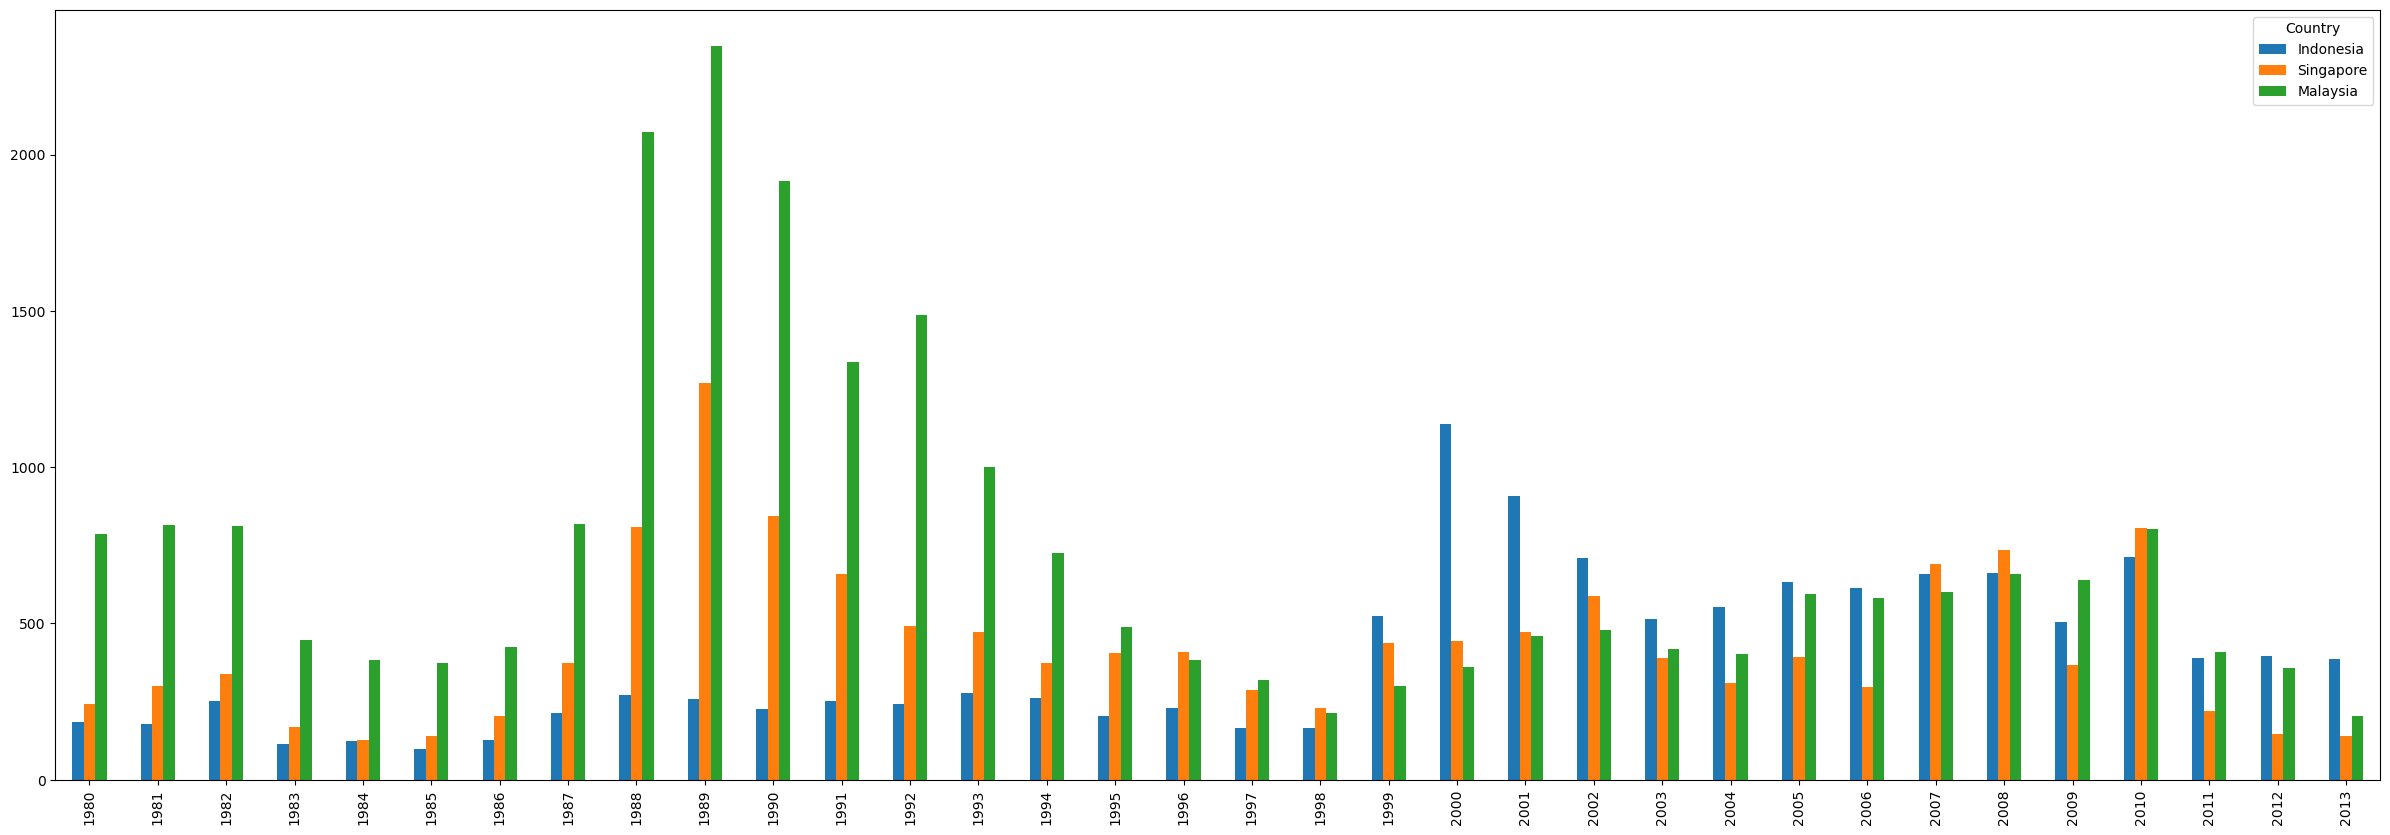

In [28]:
df_insgmy_years.T.plot(kind="bar", figsize=(30,10))

<Axes: >

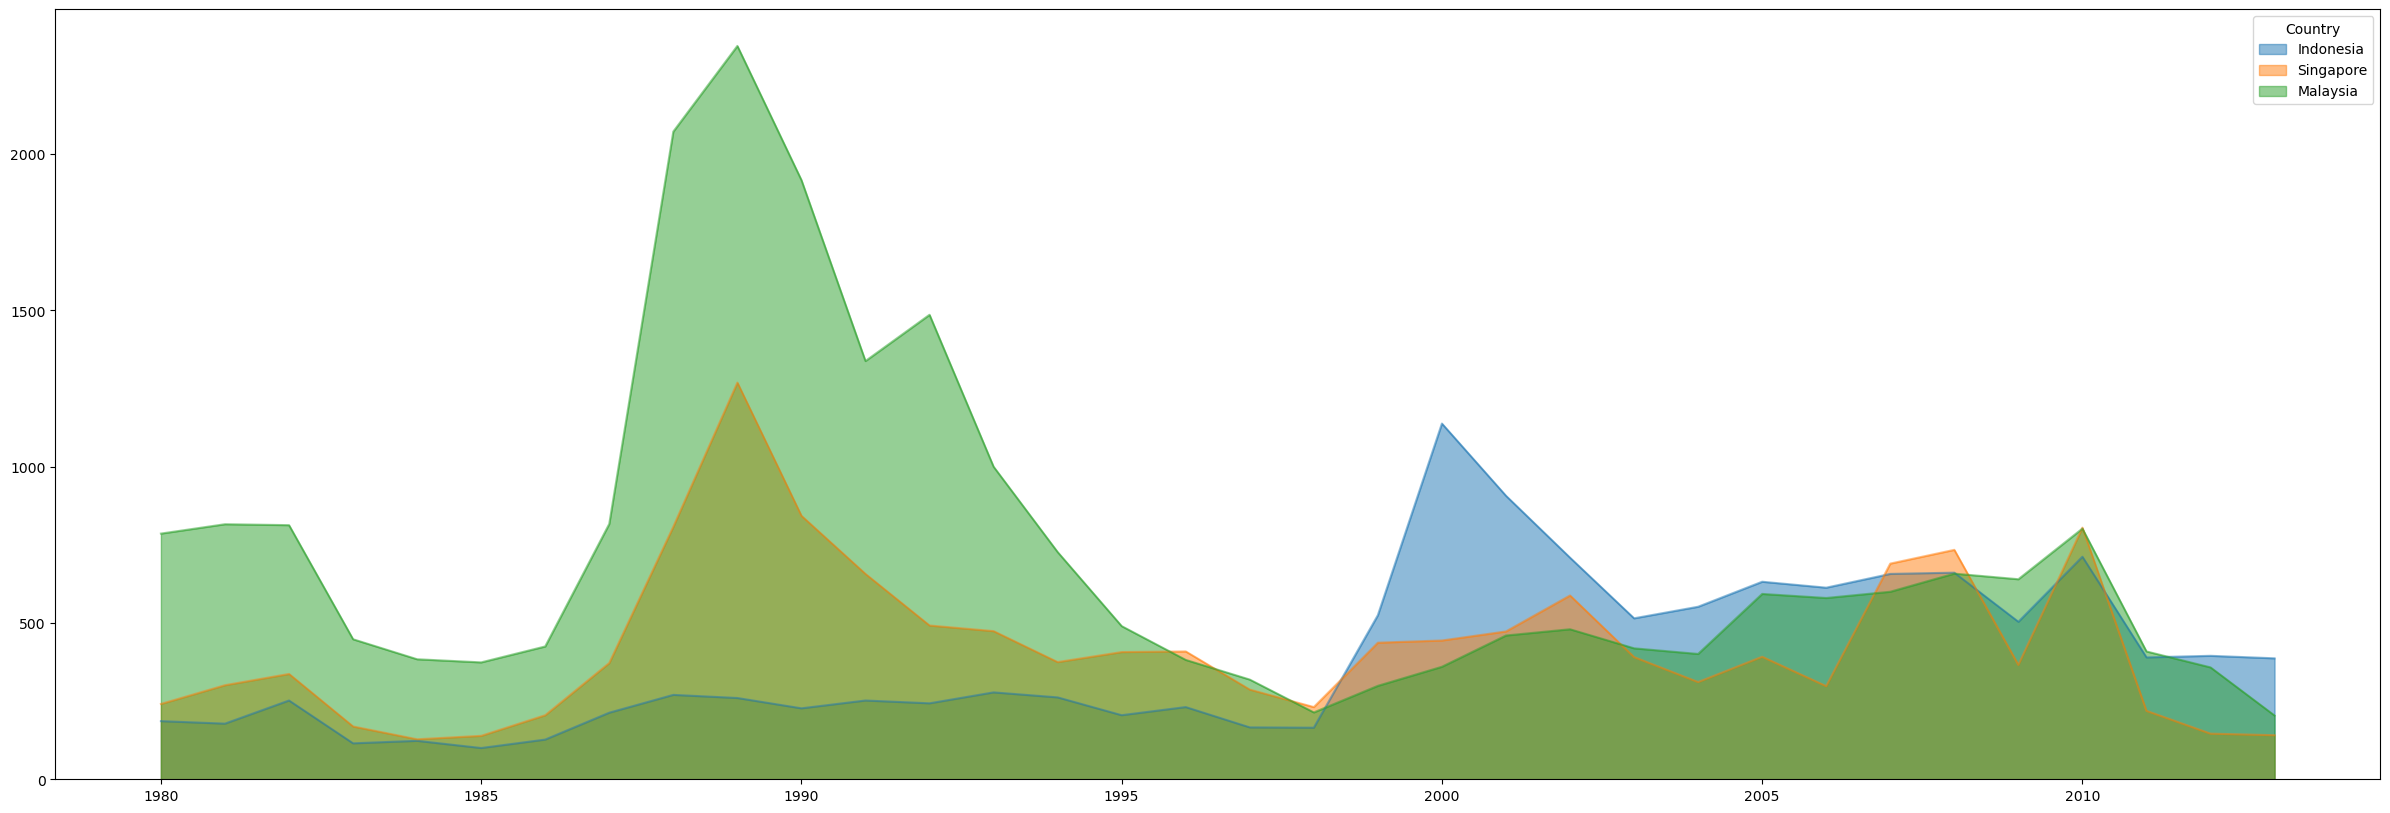

In [33]:
df_insgmy_years.T.plot(kind="area", figsize=(30,10), stacked=False)

piechart untuk membandingkan 1 hal saja, bukan trend

misal total imigrasi ke Canada antara 3 negara tadi

1 angkat total imigrasi antara 3 , bukan 3 set data yg di bandingkan tapi 3 titik data

<Axes: ylabel='1989'>

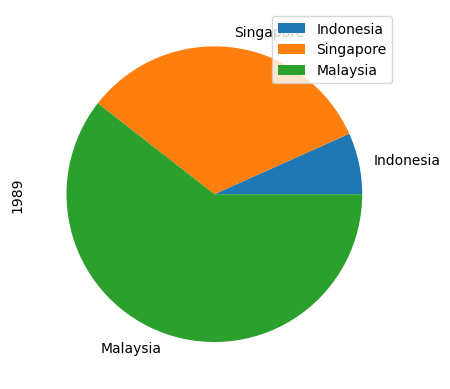

In [37]:
df_insgmy_years_1989 = df_insgmy_years.T.loc[1989]
df_insgmy_years_1989.plot(kind='pie', legend=True)

box plot : memberi informasi 5 titik tentang sebuah data

di descriptive ada konsep "tengah" & "penyebaran" untuk mendekripsikan datanya

- Q3 , 75% dari data di bawah angka ini
- Q2, median , titik tengah , 50% dari data di bawah angka ini
- Q1 , 25% dari data di bawah angka ini

Box PLot :
- Q1
- Q2
- Q3
- Outlier : angka yg jauh dari rata2 data kita
- 

```
IQR = Q3 - Q1
```
```
pembatas atas = Q3 + 1,5 x IQR
pembatas bawah = Q1 - 1,5 x IQR
```

<Axes: >

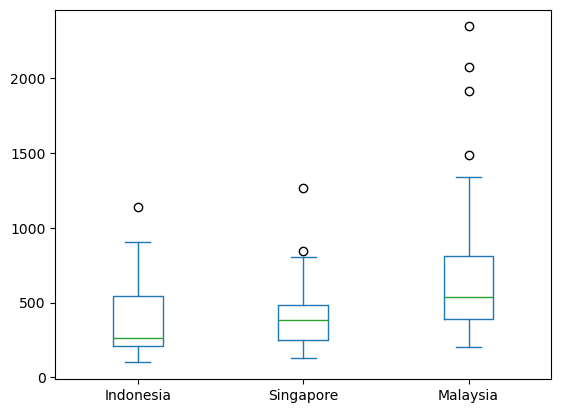

In [38]:
df_insgmy_years.T.plot(kind="box")

In [42]:
df_insgmy_years.T.describe()

Country,Indonesia,Singapore,Malaysia
count,34.000000,34.000000,34.000000
mean,386.764706,428.794118,718.147059
std,251.233449,250.619086,526.462012
min,100.000000,128.000000,204.000000
25%,207.000000,252.500000,388.250000
50%,266.000000,383.000000,535.000000
75%,545.250000,487.500000,810.250000
max,1138.000000,1269.000000,2346.000000


### Scatter Plot 
digunakan untuk melihat korelasi 2 set data, apa ada hubungan X & Y ?

- apakah ada korelasi jumlah imigran Indo dg jumlah imigran Malaysia ?

- apakah ada korelasi jumlah imigran Indo dg jumlah imigran Singapore ?

- apakah ada korelasi jumlah imigran Singapore dg jumlah imigran Malaysia ?

utk mengetahu korelasi 2 set data, kita gunakan korelasi R.

Secara visual kita gunakan scatter plot.

jika kedua set data memiliki korelasi maka:
1. pattern naik k atas kanan (positive)
2. pattern turun ke bawah kanan (negative)

positive correlation : X banyak, Y banyak

negaitve correlation : X banyak, Y sedikit

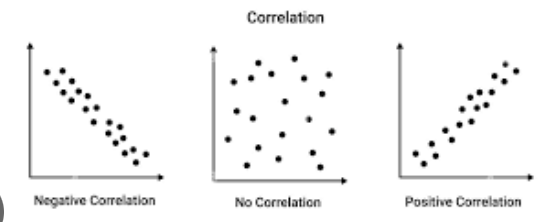

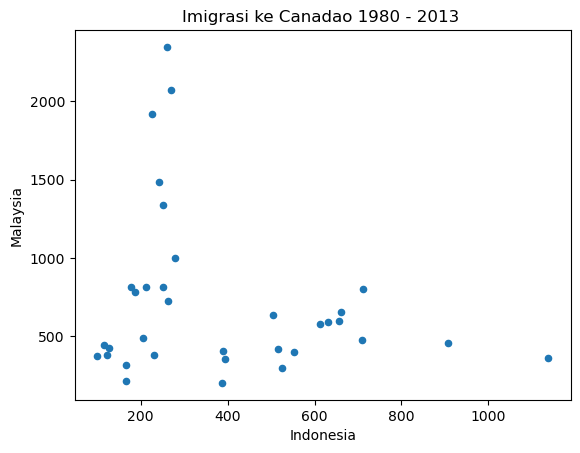

In [45]:
#scatter plot 
df_insgmy2 = df_insgmy_years.T 
df_insgmy2.plot(kind="scatter", x="Indonesia", y="Malaysia")
plt.title("Imigrasi ke Canadao 1980 - 2013 ")
plt.show()
#artinya tidak ada korelasi

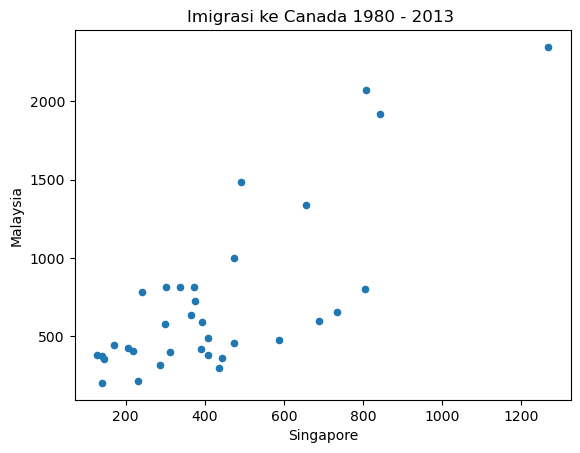

In [46]:
df_insgmy2 = df_insgmy_years.T 
df_insgmy2.plot(kind="scatter", x="Singapore", y="Malaysia")
plt.title("Imigrasi ke Canada 1980 - 2013 ")
plt.show()

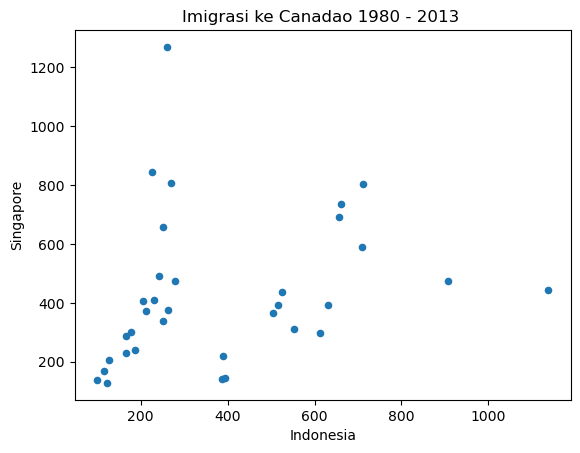

In [47]:
df_insgmy2 = df_insgmy_years.T 
df_insgmy2.plot(kind="scatter", x="Indonesia", y="Singapore")
plt.title("Imigrasi ke Canadao 1980 - 2013 ")
plt.show()

angka korelasi mendekati 0 seperti 0,01 artinya lemah

angka korelasi mendekati 1 atau -1 artinya korelasi kuat , 1 ke arah positif & -1 ke arah negative

korelasi ke diri sendiri selalu 1

In [48]:
df_insgmy2.corr()

Country,Indonesia,Singapore,Malaysia
Country,,,
Indonesia,1.000000,0.238299,-0.215514
Singapore,0.238299,1.000000,0.771550
Malaysia,-0.215514,0.771550,1.000000


histogram adalah chart yg digunakan untuk lihat distribusi data
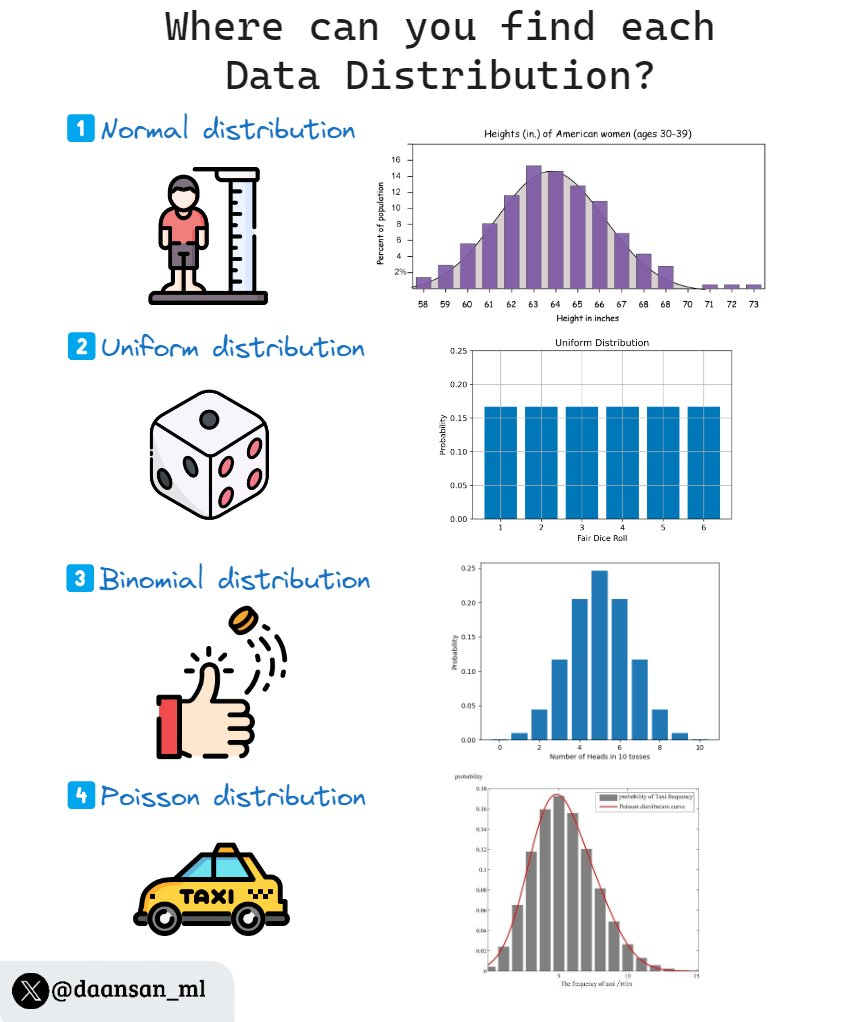

tergantung dari jenis data, dan penyebaran data seperti apa, kita bisa menjelaskan data tersebut memiliki distribusi tertentu.

distribusi tipe normal, gaussian distribution, akan sering muncul di data yang kita miliki. karena ini adalah distribusi data continuous, misalnya survey tinggi badan atau berat badan peserta.

continuous adalah angka yang berjalan terus tanpa pembatas yang pasti: tinggi, jarak, berat, uang, waktu. ini adalah data yang jumlah desimal poin tergantung dari alat ukur yang kita gunakan. misalnya untuk berat badan, timbangan biasa bisa menghitung sampai 1 desimal poin - 50.1kg, 78.9kg... timbangan digital bisa memperlihatkan sampai 2 desimal poin - 50.12kg, 78.98kg... timbangan untuk kue yang kecil dan khusus bisa memperlihatkan sampai 3 desimal poin. tidak ada pembatas pasti antara berat badan Andi dan Budi sama sama di 50kg tapi bisa beda desimal poinnya.

discrete adalah tipe data yang bulat dan pasti. misalnya hasil lempar dadu.

konsep histogram adalah menghitung frekuensi.

misalnya kita survey 100,000 orang untuk berat badannya, lalu kita mau hitung ada berapa orang di setiap berat badan tertentu... kita tidak bisa pakai bar chart. kita tidak bisa hitung ada berapa orang di 50kg karena bisa saja angkanya 0, karena yang di survey beratnya di 50.1kg 50.02kg 50.81kg... gak ada yang pas di 50.000kg

karena itu, kita bukan menghitung berapa orang di 50kg. kita hitungnya berapa orang di 40-50kg. berapa orang di 50-60kg, 70-80kg, 80-90kg, ...

pembagian kelompok2 berat ini kita namakan bin

nanti kita bisa pilih mau punya berapa bin di histogram kita.

kalau sudah punya bin, kita tinggal hitung dari data kita, masing masing bin ada berapa orang. jadilah sebuah histogram.

In [49]:
df_socr = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/refs/heads/main/SOCR-HeightWeight.csv")
df_socr

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [50]:
#histogram berat badan
df_socr.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


<Axes: ylabel='Frequency'>

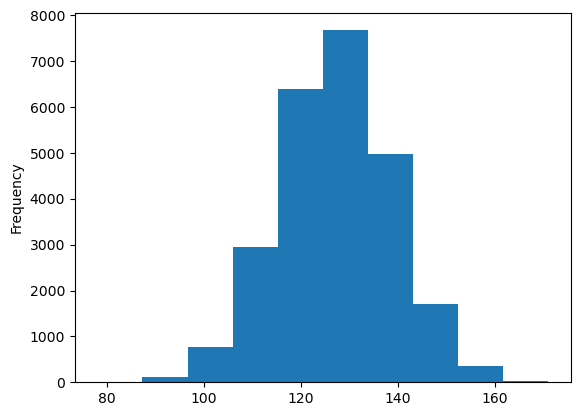

In [52]:
#kelompokin dulu baru bisa di pakai jadi histogram
df_socr["Weight(Pounds)"].plot(kind="hist")

In [54]:
data_beratbadan = df_socr["Weight(Pounds)"]
freq, bin_edges = np.histogram(data_beratbadan)
print(freq)
print(bin_edges)

[  13  112  759 2949 6397 7677 4986 1714  360   33]
[ 78.01476   87.305684  96.596608 105.887532 115.178456 124.46938
 133.760304 143.051228 152.342152 161.633076 170.924   ]


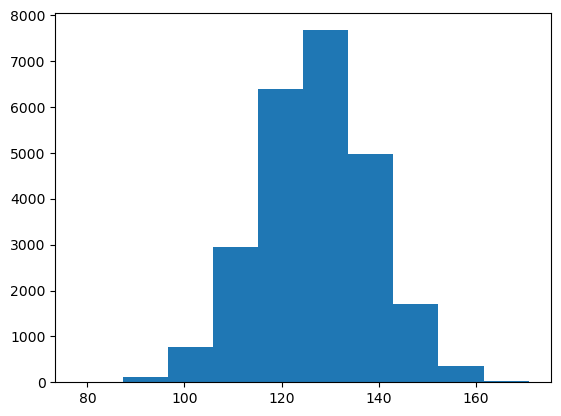

In [66]:
values, bins, bars = plt.hist(data_beratbadan)

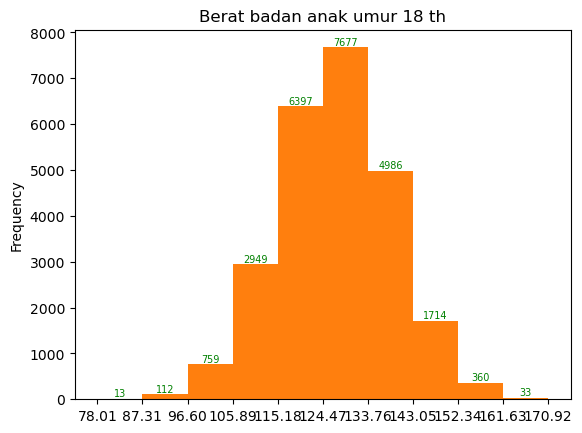

In [72]:
data_beratbadan.plot(kind="hist", xticks=bin_edges)
plt.hist(data_beratbadan)
plt.title("Berat badan anak umur 18 th")
plt.bar_label(bars, fontsize=7, color="green")
plt.show()

<Axes: ylabel='Frequency'>

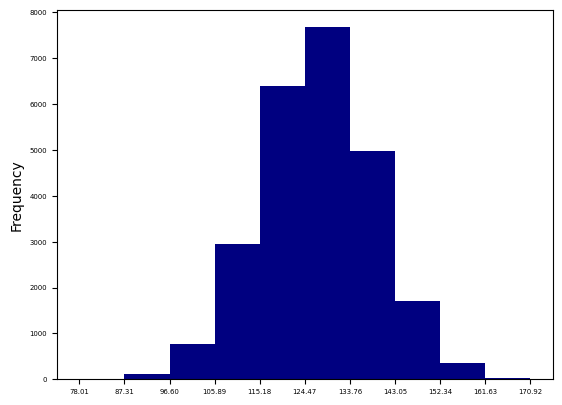

In [58]:
data_beratbadan.plot(kind="hist", xticks=bin_edges, fontsize=5, color="navy")

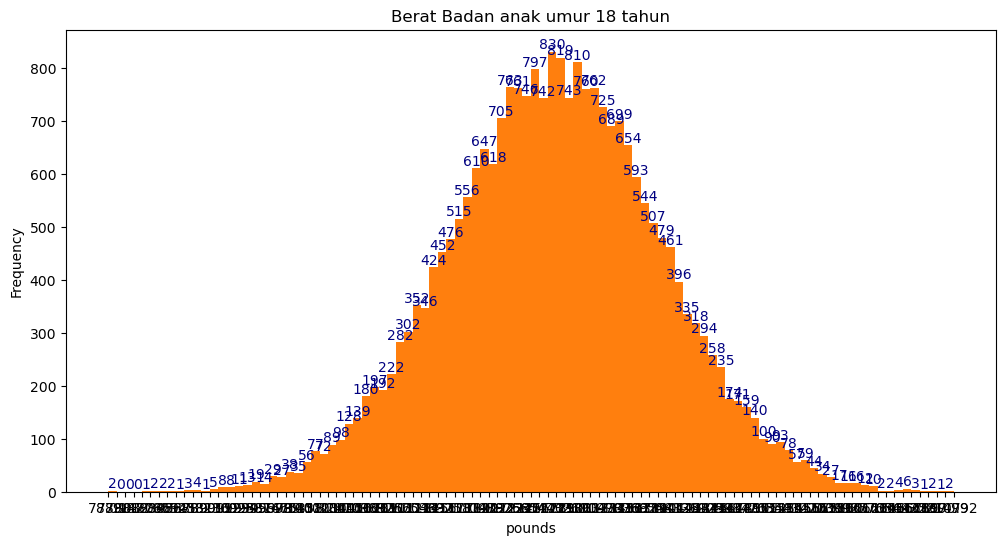

In [76]:
n = 100

data_beratbadan = df_socr['Weight(Pounds)']

freq, bin_edges = np.histogram(data_beratbadan, bins=n)
values, bins, bars = plt.hist(data_beratbadan, bins=n)

data_beratbadan.plot(kind="hist", xticks=bin_edges, figsize=(12,6), bins=n)
plt.bar_label(bars, fontsize=10, color='navy')
plt.title("Berat Badan anak umur 18 tahun")
plt.xlabel("pounds")
plt.show()

## Descriptive Statistics

### konsep
- population vs sample
- outlier
- continous vs discrete data

### angka2 statistik
- measure of central tendency
- measure of spread
- correlation

population = seluruh data yg ingin di analisa

biasanya tdk memiliki populations, hanya sebagian

sample adalah sebagian dari population. sebisa mungkin sample data yg baik , memiliki representasi data dari setiap populiasi. jika tdk sample menjadi bias. Misal hanya ambil data gaji hasil survey di UI jakarta jadi bias ke orang Indonesia di Jakarta saja.

outlier : data yg jauh sendiri, jauh dari data tengah


## angka angka statistik
- measure of central tendency
- measure of spread
- correlation

### Measure of Central Tendency   
adalah mendeskripsikan data kita tengahnya dimana
- mean
  - weighted
  - geometric
  - harmonic
- median
- modus

### Measure of Spread / Dispersion
adalah mendeskripsikan data kita penyebarannya seperti apa. dari titik tenga tadi +- nya banyak atau sedikit.
- standard deviation
  - variance, variance adalah standard deviation di akar
- skewnewss
- percentiles dan quartiles
- ranges

### Correlation
adalah mendeskripsikan data dari hubungannya dengan data lain
- R correlation coefficient



In [77]:
#data central tendency
df_socr.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [78]:
#rata2 biasa
#rata2 berat badan dari yg kita miliki, data anak umur 18 tahun
rata2 = df_socr['Weight(Pounds)'].mean()
rata2

127.07942116080001

In [80]:
#weighted mean
#kalau mau cari rata2 dari data yg beda bobotnya, perlu weighted mean
#misalnya nilai assignment 70,80,60. lalu final project yg bobotnya 50% adalah di 80

nilai = [70,80,60, 80]
bobot = [0.15, 0.15, 0.2, 0.5]

#pakai bantuan numpy
wmean = np.average(nilai, weights=bobot)
wmean

74.5

In [81]:
#geometric mean
#kalau kita perlu rata2 nilai yg tidak sama unitnya
#seller A di tokped 700 rating, dengan 3.9 bintang
#seller B di tokped 1200 rating, dengan 3.5 bintang
#seller mana yg lebih baik ?

import scipy.stats

sellerA = [700,3.9]
sellerB = [1200,3.5]

print("Seller A:", scipy.stats.gmean(sellerA))
print("Seller B:", scipy.stats.gmean(sellerB))

Seller A: 52.249401910452505
Seller B: 64.80740698407861


In [82]:
#harmonic mean
#kita gunakan untuk mencari rata2 tanpa terkecoh outlier
#misal ada gaji startup, gaji karyawan tidak seimbang
#mau hitung rata2 gaji di perusahaan tsb

# misalkan gaji karyawan ada di antara 3-6j
gaji = [5, 6, 4, 3.5, 5.2, 6.0, 4.8, 5.5, 3.7, 100.0]

np.mean(gaji)

14.37

In [83]:
#harmonic means
scipy.stats.hmean(gaji)

5.176580681427282

harmonic mean tidak terpengaruh dengan outlier

In [84]:
#median
df_socr.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [85]:
df_socr["Weight(Pounds)"].median()

127.15775

In [86]:
#modus : data yg paling sering muncul, untuk data discrete
df_socr["Weight(Pounds)"].mode()

0    124.7975
Name: Weight(Pounds), dtype: float64

In [88]:
df_socr[df_socr['Weight(Pounds)']==124.7975]

,Index,Height(Inches),Weight(Pounds)
167,168,66.29180,124.7975
711,712,67.03849,124.7975
11834,11835,64.20874,124.7975
14307,14308,66.73179,124.7975


In [89]:
df_socr.shape

(25000, 3)

dari 25rb data, hanya ada empat orang yang beratnya pas di 124.7975 pounds. jadi data mode (modus) untuk data tipe continuous kurang berguna.

### spread
- standard deviation
  - variance, variance adalah standard deviation di akar
- skewnewss
- percentiles dan quartiles
- ranges

standard deviation mencoba menunjukkan seberapa banyak datanya menyebar dari titik tengah.

skewness, datanya miring dari distribusi normal, kita bisa deskripsikan kemiringan ini dengan angka skewness

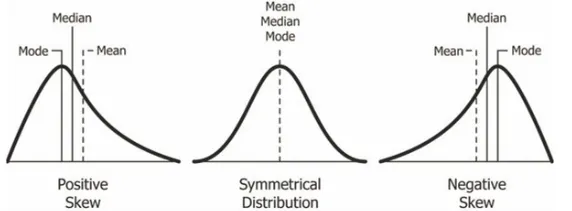

percentiles adalah cara kita memisahkan data setelah diurutkan.

percentile ke 25 adalah quartile ke 1, adalah titik dimana 25% dari datanya memiliki value dibawah angka ini.
percentile ke xx adalah titik dimana xx% dari datanya memiliki value dibawah angka ini.
misalnya percentil ke 10 harga rumah di Jakarta adalah 210jt rupiah, berarti 10% dari semua rumah yang dijual di jakarta harga dibawah 210jt rupiah.

quartile adalah percentile tertentu. Q1 = p-25. Q2 = p-50 = median. Q3 = p-75.

range adalah max - min. lebar datanya. perbedaan data kita antara max dan min

In [90]:
#standart deviation
df_socr.head()
df_socr['Weight(Pounds)'].std()

11.660897563604289

In [92]:
weight_sd = df_socr['Weight(Pounds)'].std()
weight_sd

# secara default, std() pandas memiliki ddof 1

11.660897563604289

In [93]:
# kalau kita set ddof ke 0, maka hasil std yang dihitung akan lebih kecil
# kita berasu
df_socr['Weight(Pounds)'].std(ddof=0) - weight_sd

-0.00023322028349781476

In [94]:
df_socr['Weight(Pounds)'].std(ddof=1)

11.660897563604289

data sample selalu lebih dianggap besar penyebarannya dibandingkan data population

## Data Skewerness